<a href="https://colab.research.google.com/github/vijjus/ST-summer-2024/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=b9afd549567b9b6c0199313bad42b8ebf22f929e403a40ceffd3553f65b64fa7
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [4]:
import face_recognition
import matplotlib.pyplot as plt

In [5]:
picture_of_me = face_recognition.load_image_file("/content/vijay1.png")

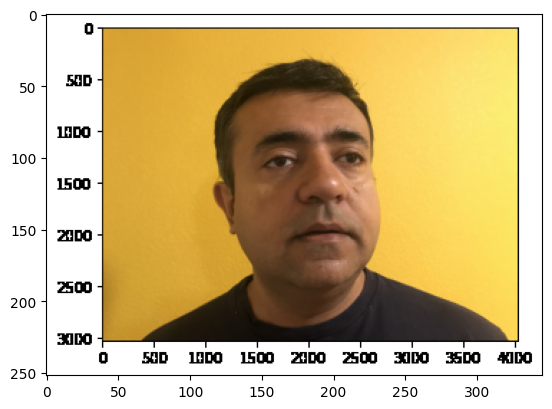

In [6]:
plt.imshow(picture_of_me)

In [7]:
my_face_encoding = face_recognition.face_encodings(picture_of_me)[0]

In [8]:
type(my_face_encoding)

numpy.ndarray

In [9]:
my_face_encoding.shape

(128,)

In [10]:
my_face_encoding

array([-0.10914093,  0.12195063, -0.00409931, -0.03554627, -0.03097062,
       -0.06410219,  0.01095788, -0.09173943,  0.22478491, -0.09012303,
        0.14540352,  0.05385546, -0.17779157,  0.00552848, -0.01453217,
        0.11215721, -0.1227931 , -0.07996546, -0.16474837, -0.03164724,
        0.11944494,  0.06972975,  0.0950395 , -0.01971119, -0.13036811,
       -0.31159341, -0.13454926, -0.11887209,  0.01561228, -0.06957433,
        0.10465962, -0.0315062 , -0.17159644, -0.09180637,  0.00793628,
        0.02626233, -0.08014297,  0.01574776,  0.21090443,  0.10600705,
       -0.19143066,  0.11250922, -0.00860867,  0.31402597,  0.14919306,
        0.14154008, -0.01494785, -0.07874383,  0.05847394, -0.25540295,
        0.12218128,  0.07716181,  0.11028646,  0.04906745,  0.17550975,
       -0.0801513 ,  0.10644422,  0.04118663, -0.27345228,  0.05511856,
        0.11851237, -0.05820262, -0.00675851,  0.02101345,  0.22931889,
        0.12405685, -0.08660358,  0.0033578 ,  0.16494183, -0.12

In [11]:
picture1 = face_recognition.load_image_file("/content/vijay2.png")

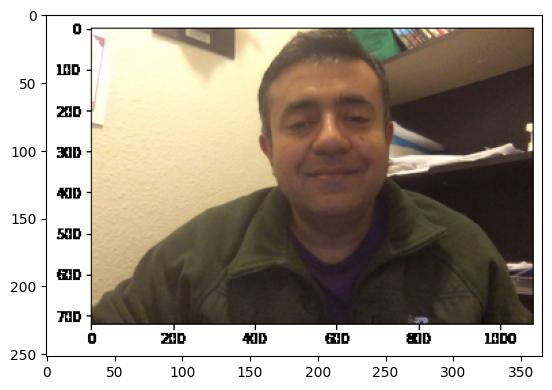

In [17]:
plt.imshow(picture1)

In [12]:
picture1_encoding = face_recognition.face_encodings(picture1)[0]

In [13]:
results = face_recognition.compare_faces([my_face_encoding], picture1_encoding)

In [14]:
results

[True]

In [15]:
def compare_encodings(mine, other):
  results = face_recognition.compare_faces([mine], other)
  if results[0] == True:
    print("It's a picture of me!")
  else:
    print("It's not a picture of me!")

In [16]:
compare_encodings(my_face_encoding, picture1_encoding)

It's a picture of me!


In [18]:
picture2 = face_recognition.load_image_file("/content/vijay3.png")

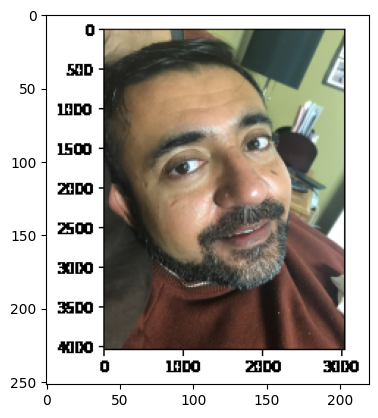

In [19]:
plt.imshow(picture2)

In [20]:
picture2_encoding = face_recognition.face_encodings(picture2)[0]

In [22]:
compare_encodings(my_face_encoding, picture2_encoding)

It's a picture of me!


In [24]:
unknown_pic = face_recognition.load_image_file("/content/principal.jpeg")

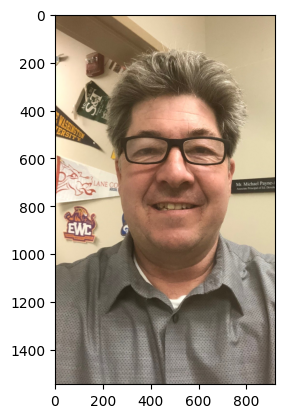

In [25]:
plt.imshow(unknown_pic)

In [26]:
unk_encoding = face_recognition.face_encodings(unknown_pic)[0]

In [27]:
compare_encodings(my_face_encoding, unk_encoding)

It's not a picture of me!


In [28]:
unk_encoding

array([-0.02696341,  0.11356597,  0.00649121,  0.04308426, -0.16171077,
       -0.06613159,  0.02974654, -0.11556688,  0.0777766 , -0.05624042,
        0.24945897, -0.09561508, -0.23248018, -0.04856782, -0.00593182,
        0.12725899, -0.12148808, -0.0940267 , -0.16836968, -0.04888324,
        0.02759697,  0.00811134,  0.00695982,  0.04583545, -0.08382566,
       -0.36646408, -0.02186859, -0.10297444,  0.17166096, -0.09603935,
       -0.06168586,  0.08386692, -0.1607157 , -0.11417675,  0.09788159,
       -0.00715708, -0.03060598, -0.02660727,  0.24644959,  0.00771689,
       -0.21706475, -0.00368028,  0.04819076,  0.24569088,  0.19167498,
        0.1055695 ,  0.03017128, -0.15358631,  0.09984668, -0.23338625,
        0.02423804,  0.14039235,  0.13713712,  0.05856586,  0.07204659,
       -0.13961679,  0.03764767,  0.02072373, -0.23656204,  0.02038137,
        0.11243126, -0.11193538, -0.02461248, -0.08618379,  0.22951984,
       -0.01598433, -0.10792001, -0.02726027,  0.08942056, -0.22

In [29]:
from numpy import dot
from numpy.linalg import norm

In [30]:
def cos_sim(a, b):
  cs = dot(a, b)/(norm(a)*norm(b))
  print(cs)

In [31]:
cos_sim(my_face_encoding, picture1_encoding)

0.9568542465106394


In [32]:
cos_sim(my_face_encoding, unk_encoding)

0.8655596641599975


In [39]:
def encode_image(image_path):
  img = face_recognition.load_image_file(image_path)
  img_encoding = face_recognition.face_encodings(img)[0]
  plt.imshow(img)
  plt.show()
  return img_encoding

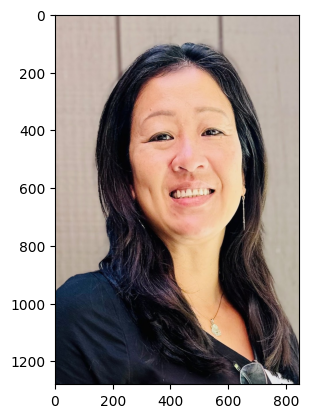

In [40]:
img_encoding = encode_image("/content/mynguyen.jpeg")

In [38]:
cos_sim(my_face_encoding, img_encoding)

0.8110700538813794


In [43]:
doggy_encoding = encode_image("/content/doggy.jpeg")

IndexError: list index out of range

In [44]:
def encode_image(image_path):
  img = face_recognition.load_image_file(image_path)
  plt.imshow(img)
  plt.show()
  try:
    img_encoding = face_recognition.face_encodings(img)[0]
  except Exception as e:
    print(f"ERROR: {e}")
    return None
  return img_encoding

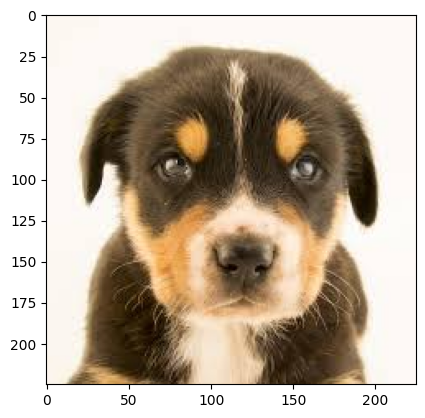

ERROR: list index out of range


In [45]:
doggy_encoding = encode_image("/content/doggy.jpeg")